In [3]:
# Start by running this block and then answer each question in the block below the question.
import requests
import pandas as pd
import matplotlib.pyplot as plt 
drug_list = ['Tramadol', 'Prednisone', 'Jardiance', 'Pantoprazole', 'Bunavail']

Q1: Find the molecular weight and exact mass for the drugs Tramadol, Prednisone, Jardiance, Pantoprazole, and Bunavail using pug rest

In [2]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

molecular_weights = []
exact_masses = []

for x in drug_list:
    url = prolog + "/compound/name/" + x + "/property/molecularweight/txt"
    res = requests.get(url)
    molecular_weights.append(str(res.text[:-1]))
    url2 = prolog + "/compound/name/" + x + "/property/exactmass/txt"
    res2 = requests.get(url2)
    exact_masses.append(str(res2.text[:-1]))

print('Exact Masses: ', exact_masses)
print('Molecular Weights: ', molecular_weights)


Exact Masses:  ['263.188529040', '358.17802393', '450.1445309', '383.07513347', '794.45061694']
Molecular Weights:  ['263.37', '358.4', '450.9', '383.4', '795.0']


Q2: Next import this data into a dataframe. There are many ways to do this but one simple method is to use the  pandas command read_table which can take a url as input just like requests.get does.

In [3]:
properties = []

for x in drug_list:
    
    response = requests.get(url)
    properties.append(response.text)

for x, y in enumerate(drug_list):
    url = prolog + "/compound/name/" + y + "/property/molecularweight,exactmass/csv"

    if x == 0:
        df = pd.read_table(url, ',')    

    else:
        df2 = pd.read_table(url, ',')
        df = pd.concat([df, df2])

df

,CID,MolecularWeight,ExactMass
0,33741,263.37,263.188529
0,5865,358.40,358.178024
0,11949646,450.90,450.144531
0,4679,383.40,383.075133
0,11274356,795.00,794.450617


In [6]:
# alternate with read_csv(url)
cids=[]

for name in drug_list:
    cidd = ('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/'+name+'/cids/txt')
    cid = requests.get(cidd)
    cid=(cid.text)
    cid=(str(cid))
    cids.append(int(cid))


pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/molecularweight,ExactMass/"
pugout  = "csv"
pugin = "compound/cid/" + ",".join([ str(x) for x in cids])
url = "/".join( [pugrest, pugin, pugoper, pugout] ) 
  
df = pd.read_csv(url)
df 

,CID,MolecularWeight,ExactMass
0,33741,263.37,263.188529
1,5865,358.40,358.178024
2,11949646,450.90,450.144531
3,4679,383.40,383.075133
4,11274356,795.00,794.450617


Q3: Next make a scatterplot of Exact Mass vs Molecular Weight

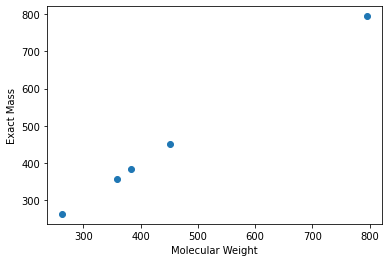

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.MolecularWeight, df.ExactMass)     # plot of boiling point (in K) vs molecular weight
plt.xlabel('Molecular Weight')
plt.ylabel('Exact Mass')
plt.show()

Q4: Using the "fastformula" property find how many molecules in pubchem have the same molecular formula as each of these drugs.

In [5]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/MolecularFormula"
pugout  = "txt"

drug_formulas = []

for i in range(len(drug_list)):   
    
    pugin = "compound/name/" + drug_list[i]   
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    drug_formulas.append(res.text.strip('\n'))

fastformula_list = []

for i in drug_formulas:

    url = pugrest + "/compound/fastformula/"+ i + "/cids/txt"
    res = requests.get(url)
    cids = res.text.split()
    fastformula_list.append(len(cids))
    print("Compound:", i, "# Number of CIDs:", len(cids))

Compound: C16H25NO2 # Number of CIDs: 27293
Compound: C21H26O5 # Number of CIDs: 2348
Compound: C23H27ClO7 # Number of CIDs: 236
Compound: C16H15F2N3O4S # Number of CIDs: 272
Compound: C48H62N2O8 # Number of CIDs: 51


Q5: Obtain the number of CIDs that contain a substructure for each of the drugs in the list.

In [6]:
cid_list = [33741, 5865, 11949646, 4679, 11274356]
substructure_list = []

for cid in cid_list:
    c_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsubstructure/cid/{cid}/cids/txt"
    c_res = requests.post(c_url)
    res2 = c_res.text
    substructure_list.append(len(res2))

print(substructure_list)

[3983, 2061, 925, 2498, 93]


Q6: Plot the number of CIDs containing a substructure vs. the number of compounds with the same molecular formula

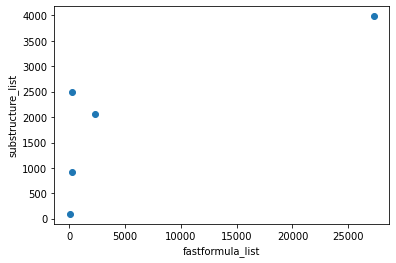

In [7]:
plt.scatter(fastformula_list, substructure_list) 
plt.xlabel('fastformula_list')
plt.ylabel('substructure_list')
plt.show()